# Predicting Housing Prices

In this project, I've built a Decision Tree model that predicts House Prices. The model has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. 

For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.
- `'MEDV'` is the median house value in the neighborhood.

For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Load the Boston housing dataset, along with a few of the necessary Python libraries

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

C:\Users\eg62453\AppData\Local\conda\conda\envs\my_root\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
Let's explore some statistics about the dataset to get a feel for it

In [2]:
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(prices.min()))
print("Maximum price: ${:,.2f}".format(prices.max()))
print("Mean price: ${:,.2f}".format(prices.mean()))
print("Median price ${:,.2f}".format(prices.median()))
print("Standard deviation of prices: ${:,.2f}".format(prices.std()))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,340.28


----

## Developing a Model

### Shuffle and Split Data
We split the data into training and testing subsets. We also shuffle the data into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

In [3]:
from sklearn.model_selection import train_test_split 

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, random_state=1)

# Success
print('Number of rows in the total set: {}'.format(data.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 489
Number of rows in the training set: 366
Number of rows in the test set: 123


### Fitting a Model
We will train a model using the **decision tree algorithm**. We'll train the model using the grid search technique to optimize the `'max_depth'` parameter. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction.

The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*.

I've used the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify my model's performance. The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.metrics  import r2_score
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': np.arange(1,11)}
    
    # Transform 'r2_score' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(r2_score)

    # Create the grid search cv object --> GridSearchCV() to optimze parameters
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

C:\Users\eg62453\AppData\Local\conda\conda\envs\my_root\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Fit model and see what is the optimal max_depth for the Decision Tree regressor

In [5]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the optimal value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


### Visualizing Model Performance with Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `r2_score`

C:\Users\eg62453\AppData\Local\conda\conda\envs\my_root\lib\site-packages\sklearn\learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


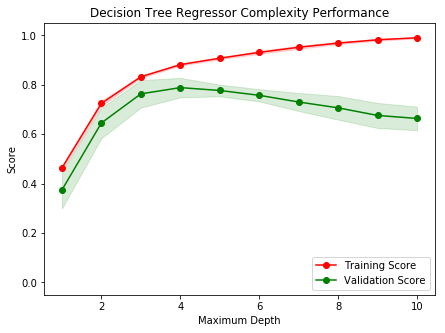

In [6]:
import matplotlib.pyplot as pl
import sklearn.learning_curve as curves
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import ShuffleSplit, train_test_split

# Create 10 cross-validation sets for training and testing
cv = ShuffleSplit(X_train.shape[0], n_iter = 10, test_size = 0.2, random_state = 0)

# Vary the max_depth parameter from 1 to 10
max_depth = np.arange(1,11)

# Calculate the training and testing scores
train_scores, test_scores = curves.validation_curve(DecisionTreeRegressor(), X_train, y_train, \
    param_name = "max_depth", param_range = max_depth, cv = cv, scoring = 'r2')

# Find the mean and standard deviation for smoothing
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the validation curve
pl.figure(figsize=(7, 5))
pl.title('Decision Tree Regressor Complexity Performance')
pl.plot(max_depth, train_mean, 'o-', color = 'r', label = 'Training Score')
pl.plot(max_depth, test_mean, 'o-', color = 'g', label = 'Validation Score')
pl.fill_between(max_depth, train_mean - train_std, \
    train_mean + train_std, alpha = 0.15, color = 'r')
pl.fill_between(max_depth, test_mean - test_std, \
    test_mean + test_std, alpha = 0.15, color = 'g')

# Visual aesthetics
pl.legend(loc = 'lower right')
pl.xlabel('Maximum Depth')
pl.ylabel('Score')
pl.ylim([-0.05,1.05])
pl.show()

The Decision Tree model with the best validation loss has indeed a Max Depth = 4

### Making Predictions
The model has learned *what the best questions to ask about the input data are*, and can respond with a prediction

Let's test our model to predict the price of the following houses: 

| Features | House 1 | House 2 | House 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

In [7]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $411,417.39
Predicted selling price for Client 2's home: $231,918.75
Predicted selling price for Client 3's home: $937,230.00
